<a href="https://colab.research.google.com/github/NallelyPintor/CNN-for-Leaf-Disease-Classification/blob/main/CNN_in_Leaf_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!ls

enfermedades_plantas.zip  plantas  sample_data


In [6]:
!unzip enfermedades_plantas.zip

Archive:  enfermedades_plantas.zip
   creating: tomate_bacteria_presente/
  inflating: __MACOSX/._tomate_bacteria_presente  
  inflating: tomate_bacteria_presente/f2f807a2-8777-4a1f-a33b-d1826d9d36c8___GCREC_Bact.Sp 3786.JPG  
  inflating: __MACOSX/tomate_bacteria_presente/._f2f807a2-8777-4a1f-a33b-d1826d9d36c8___GCREC_Bact.Sp 3786.JPG  
  inflating: tomate_bacteria_presente/f3bbf9c8-06fd-4f1e-930a-f576c0fbc06d___GCREC_Bact.Sp 3717.JPG  
  inflating: __MACOSX/tomate_bacteria_presente/._f3bbf9c8-06fd-4f1e-930a-f576c0fbc06d___GCREC_Bact.Sp 3717.JPG  
  inflating: tomate_bacteria_presente/f5d9fa8d-af44-4362-9134-190479bbe522___GCREC_Bact.Sp 3610.JPG  
  inflating: __MACOSX/tomate_bacteria_presente/._f5d9fa8d-af44-4362-9134-190479bbe522___GCREC_Bact.Sp 3610.JPG  
  inflating: tomate_bacteria_presente/ee21b0ab-9f7c-4d95-99db-5d53dcfd5c1b___GCREC_Bact.Sp 3770.JPG  
  inflating: __MACOSX/tomate_bacteria_presente/._ee21b0ab-9f7c-4d95-99db-5d53dcfd5c1b___GCREC_Bact.Sp 3770.JPG  
  inflating: to

In [7]:
!mkdir plantas

mkdir: cannot create directory ‘plantas’: File exists


In [8]:
!mv ./papa_primeros_signos ./plantas


In [9]:
!mv ./tomate_bacteria_presente ./plantas


In [10]:
!mv ./mais_normal ./plantas

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import  label_binarize, LabelBinarizer
from keras.preprocessing import  image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import adam_v2
#from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Flatten, Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
#from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

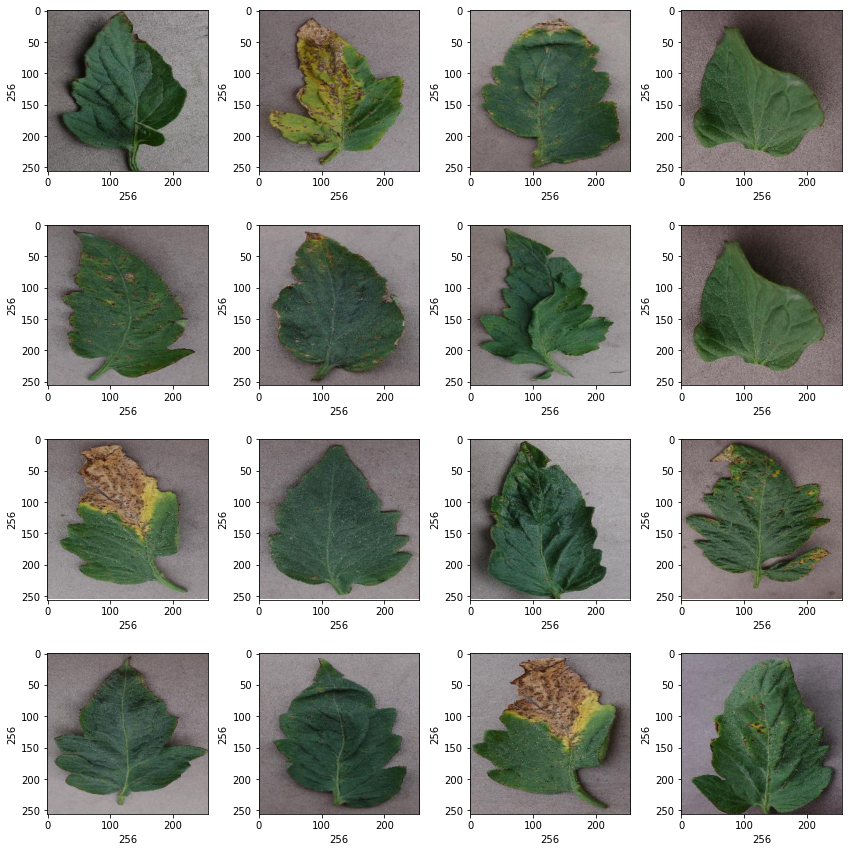

In [43]:
#Visualización del tamaño de las imagenes para saber si se tiene que redimensionar la imagen o no
plt.figure(figsize=(12,12))
#path = './plantas'
#path = '/content/plantas'
#path = '/content/plantas/mais_normal'
#path = '/content/plantas/papa_primeros_signos' 
path = '/content/plantas/tomate_bacteria_presente' 
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))

    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) #width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) #height of image

In [40]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image,(256,256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [46]:
dir = "./plantas"
root_dir = listdir(dir)
image_list,label_list =[],[]
all_labels = ['normal', 'empezando', 'enferma']
binary_labels = [0,1,2]
temp = -1

for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}") 
    temp += 1
    for files in plant_image_list:
        image_path = f'{dir}/{directory}/{files}'
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [47]:
# Numero de clases
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [48]:
image_list[0].shape

(256, 256, 3)

In [49]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [50]:
# Separacion de los datos entre set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list , test_size = 0.2, random_state = 10)

In [51]:
x_train = np.array(x_train, dtype = np.float16) /255.0
x_test = np.array(x_test, dtype = np.float16) /255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

**Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset**

In [66]:
# Usemos Keras para encodificar los valores con "one-hot enconding" 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
# Creamos una red neuronal
model = Sequential()
model.add(Conv2D(32,(3,3), padding = "same",input_shape = (256,256,3), activation = "relu"))#revisado
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3), activation = 'relu', padding = 'same'))#revisar orden de param
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                

In [56]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy']) #imagen 8

In [57]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.2)

In [58]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_val, y_val) )

Epoch 1/50
5/5 [==============================] - 37s 7s/step - loss: 1.0308 - accuracy: 0.3698 - val_loss: 0.9637 - val_accuracy: 0.4167
Epoch 2/50
5/5 [==============================] - 28s 6s/step - loss: 0.8995 - accuracy: 0.5747 - val_loss: 0.8418 - val_accuracy: 0.6250
Epoch 3/50
5/5 [==============================] - 28s 6s/step - loss: 0.7653 - accuracy: 0.6823 - val_loss: 0.7188 - val_accuracy: 0.6181
Epoch 4/50
5/5 [==============================] - 28s 6s/step - loss: 0.6353 - accuracy: 0.7153 - val_loss: 0.5939 - val_accuracy: 0.8611
Epoch 5/50
5/5 [==============================] - 29s 6s/step - loss: 0.5183 - accuracy: 0.8837 - val_loss: 0.4899 - val_accuracy: 0.8958
Epoch 6/50
5/5 [==============================] - 31s 6s/step - loss: 0.4159 - accuracy: 0.9375 - val_loss: 0.4003 - val_accuracy: 0.9306
Epoch 7/50
5/5 [==============================] - 28s 6s/step - loss: 0.3356 - accuracy: 0.9618 - val_loss: 0.3356 - val_accuracy: 0.9097
Epoch 8/50
5/5 [==================

Saving the model using different techniques

In [59]:
model.save("./plant_disease.h5")
json_model = model.to_json()
with open('./plant_model.json', 'w') as json_file:
    json_file.write(json_model)
model.save_weights('./plant_model_weights.h5')

Next we will plot the accuracy of the model for the traninig history

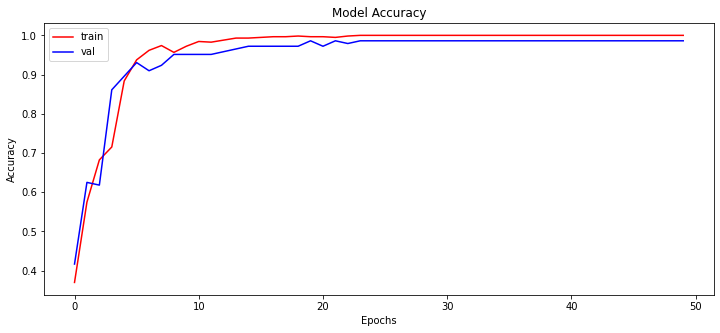

In [60]:
plt.figure(figsize =(12,5))
plt.plot(history.history ['accuracy'],color = 'r' )  #revisar parentesis
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title ('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

Evaluating the model to know the accuracy of the model 

In [67]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {scores[1]*100}')

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 417ms/step - loss: 0.0402 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


Next we will use the model to predict the testing dataset label

In [68]:
y_pred = model.predict(x_test)

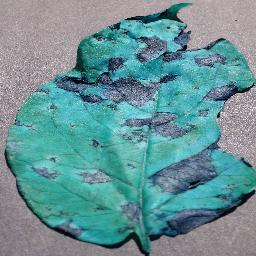

In [75]:
#Plotting image to compare
img = array_to_img(x_test[5])
img